In [65]:
import torch

## STEP 1. Make data

In [66]:
# choose the dataset you want
# case 1
# N = 20
# random0 = torch.randn(int(N/2), 1)
# random5 = torch.randn(int(N/2), 1) + 5
# class1_data = torch.hstack([random0, random5])
# class2_data = torch.hstack([random5, random0])

# class1_label = torch.ones(int(N/2),1)
# class2_label = torch.zeros(int(N/2),1)
# x = torch.vstack([class1_data, class2_data])
# y = torch.vstack([class1_label, class2_label])

# case 2
N = 100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
x = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

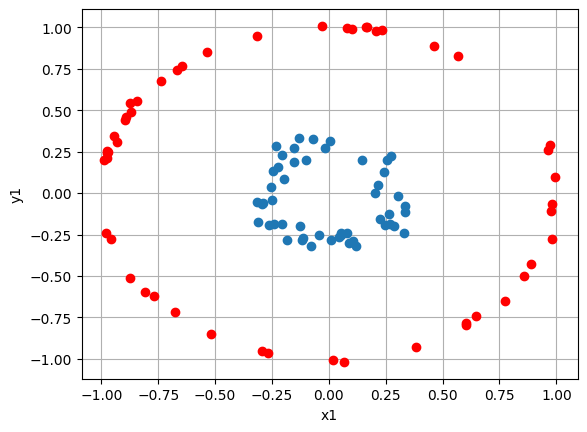

In [67]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('y1')
plt.grid()

## STEP2. Make Model

In [68]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        
        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        return x

In [69]:
model = MLP()
print(model)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


## STEP 3. Training Model

In [70]:
from torch import optim
import torch.nn.functional as F

LR = 1e-2 
EPOCH = 400 

# optimizer  = optim.SGD(model.parameters(), lr=LR) # optimizor for case 1
optimizer  = optim.adam(model.parameters(), lr=LR)   # optimizor for case 2

loss_history = []

model.train() # change into train mode
for it in range(EPOCH):
    # inference
    y_hat = model(x)
    # loss
    loss = F.binary_cross_entropy(y_hat, y) # y_hat(prediction) should be in front of y(target) ==> (y_hat, y)
    # update
    optimizer.zero_grad() # Prevent stack of gradient
    loss.backward()       # BPP(Back Propagation)
    optimizer.step()      # Weight update
    # print loss
    loss_history += [loss.item()]
    print(f'Epoch: {it+1}, train loss: {round(loss.item(),3)}')
    print('-'*20)

Epoch: 1, train loss: 0.71
--------------------
Epoch: 2, train loss: 0.694
--------------------
Epoch: 3, train loss: 0.703
--------------------
Epoch: 4, train loss: 0.695
--------------------
Epoch: 5, train loss: 0.688
--------------------
Epoch: 6, train loss: 0.689
--------------------
Epoch: 7, train loss: 0.691
--------------------
Epoch: 8, train loss: 0.689
--------------------
Epoch: 9, train loss: 0.684
--------------------
Epoch: 10, train loss: 0.682
--------------------
Epoch: 11, train loss: 0.683
--------------------
Epoch: 12, train loss: 0.684
--------------------
Epoch: 13, train loss: 0.682
--------------------
Epoch: 14, train loss: 0.68
--------------------
Epoch: 15, train loss: 0.678
--------------------
Epoch: 16, train loss: 0.678
--------------------
Epoch: 17, train loss: 0.679
--------------------
Epoch: 18, train loss: 0.678
--------------------
Epoch: 19, train loss: 0.677
--------------------
Epoch: 20, train loss: 0.676
--------------------
Epoch: 21, 

In [71]:
x = torch.tensor([1.], requires_grad=True)
for _ in range(2):
    loss=x**2
    loss.backward()
    print(x.grad)    # if you use loss.backward() without The functions below, the result would be stacked by addition.  
    x.grad = None    # x.grad = 0 doesn't work

tensor([2.])
tensor([2.])


In [72]:
print(F.binary_cross_entropy(y_hat, y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(0.0049, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0049, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

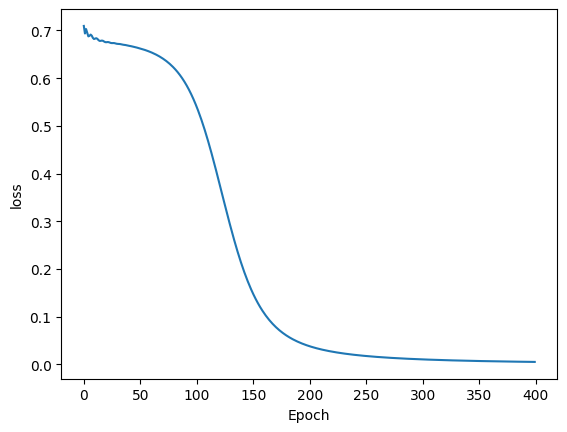

In [73]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

## STEP 4. Model Test

Text(0.5, 0.5, 'x2')

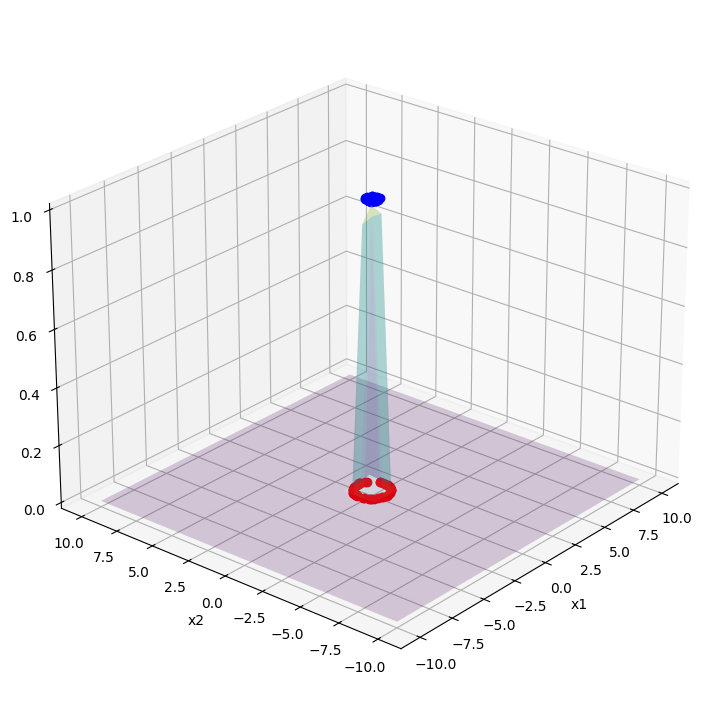

In [74]:
x1_test = torch.linspace(-10,10,30) # case 1
x2_test = torch.linspace(-10,10,30) # case 2
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)


model.eval()      # change into test mode 
with torch.no_grad():
    y_hat = model(X_test)
# 1. Train mode and Test mode in Dropout or BN have quite different operation! so you should use eval() function!
# 2. Calculate grad_fn <- it is unnecessary!

Y_hat = y_hat.squeeze()

plt.figure(figsize=[10, 9])  # figsize=[가로, 세로]
ax = plt.axes(projection='3d')
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), cmap='viridis', alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel('x1')
plt.ylabel('x2')